In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score


In [65]:
dataset = pd.read_csv('Crop_recommendation.csv')
print(dataset)

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


In [66]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


In [67]:
print("Features (X):")
print(X)
print()

# Print the labels (y)
print("Labels (y):")
print(y)

Features (X):
[[ 90.          42.          43.         ...  82.00274423   6.50298529
  202.9355362 ]
 [ 85.          58.          41.         ...  80.31964408   7.03809636
  226.6555374 ]
 [ 60.          55.          44.         ...  82.3207629    7.84020714
  263.9642476 ]
 ...
 [118.          33.          30.         ...  67.22512329   6.36260785
  173.3228386 ]
 [117.          32.          34.         ...  52.12739421   6.75879255
  127.1752928 ]
 [104.          18.          30.         ...  60.39647474   6.77983261
  140.9370415 ]]

Labels (y):
['rice' 'rice' 'rice' ... 'coffee' 'coffee' 'coffee']


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [69]:
print("Training data:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print()

print("Test data:")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


Training data:
X_train shape: (1760, 7)
y_train shape: (1760,)

Test data:
X_test shape: (440, 7)
y_test shape: (440,)


In [90]:
classifiers = [
    RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0),
    KNeighborsClassifier(n_neighbors=3),
    SVC(kernel='rbf', random_state=0),
    GradientBoostingClassifier(random_state=0),
    LogisticRegression(random_state=0,solver="liblinear", max_iter=1000),
    GaussianNB(),
    DecisionTreeClassifier(random_state=0)
]

In [91]:

# Train and evaluate the classifiers
accuracies = []
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Print the accuracies
for i, classifier in enumerate(classifiers):
    print(f"Accuracy of {classifier.__class__.__name__}: {accuracies[i]}")

Accuracy of RandomForestClassifier: 0.9931818181818182
Accuracy of KNeighborsClassifier: 0.9772727272727273
Accuracy of SVC: 0.9772727272727273
Accuracy of GradientBoostingClassifier: 0.9954545454545455
Accuracy of LogisticRegression: 0.9613636363636363
Accuracy of GaussianNB: 0.9931818181818182
Accuracy of DecisionTreeClassifier: 0.9886363636363636


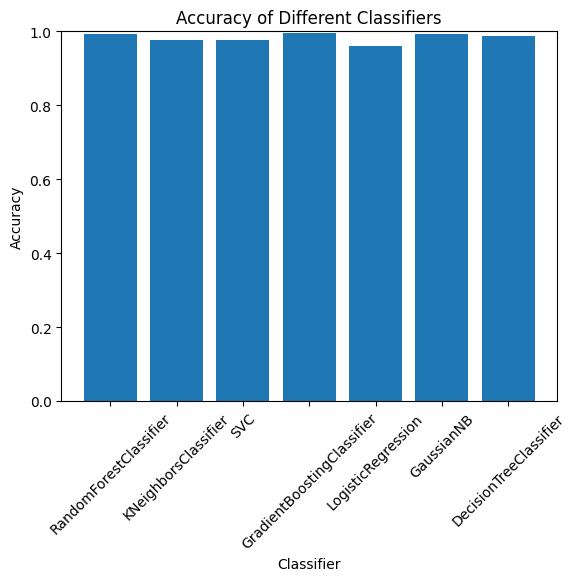

In [92]:
classifier_names = [classifier.__class__.__name__ for classifier in classifiers]

plt.bar(classifier_names, accuracies)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()